In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
df.shape

(5572, 4)

In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

In [11]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

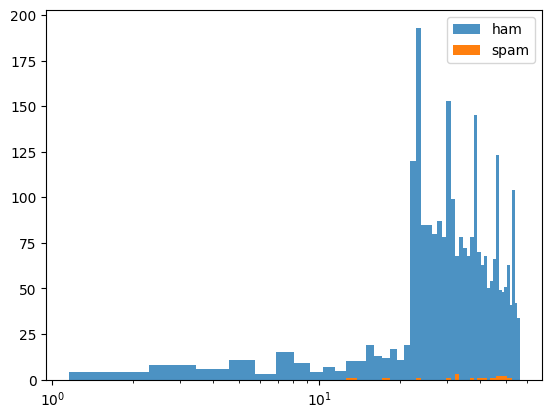

In [19]:
plt.xscale('log')
bins = 1.15*(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8,label='ham')
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=1,label='spam')
plt.legend(['ham','spam'])
plt.show()

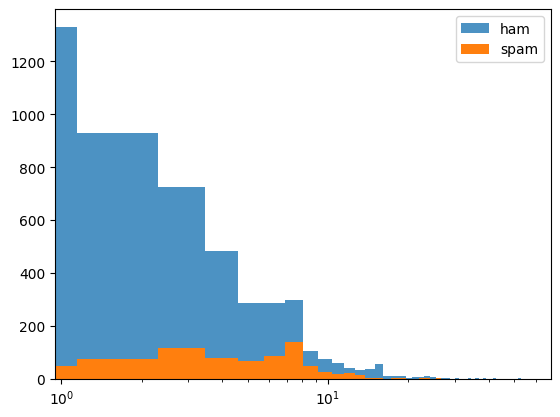

In [20]:
plt.xscale('log')
bins = 1.15*(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8,label='ham')
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=1,label='spam')
plt.legend(['ham','spam'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df['label'] = df['label'].map({'spam':1,'ham':0})
df.head()

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2


In [23]:
X = df[['length','punct']]
y = df['label']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X_train.shape

(3900, 2)

In [26]:
X_test.shape

(1672, 2)

In [27]:
y_train.shape

(3900,)

In [28]:
y_test.shape

(1672,)

In [29]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
pred = lr_model.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(y_test,pred)

0.8427033492822966

In [40]:
metrics.confusion_matrix(y_test,pred)

array([[1404,   44],
       [ 219,    5]], dtype=int64)

In [42]:
df_conf = pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['ham','spam'], columns=['ham','spam'])
df_conf

,ham,spam
ham,1404,44
spam,219,5


In [43]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1448
           1       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

pred = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,pred))

[[1438   10]
 [ 224    0]]


In [46]:
from sklearn.svm import SVC

In [48]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))

[[1373   75]
 [ 121  103]]
